
Mean Squared Error (MSE): 25855939.28
R-squared (R2): 0.95
Coefficient: 7504.67
Intercept: 34951.76


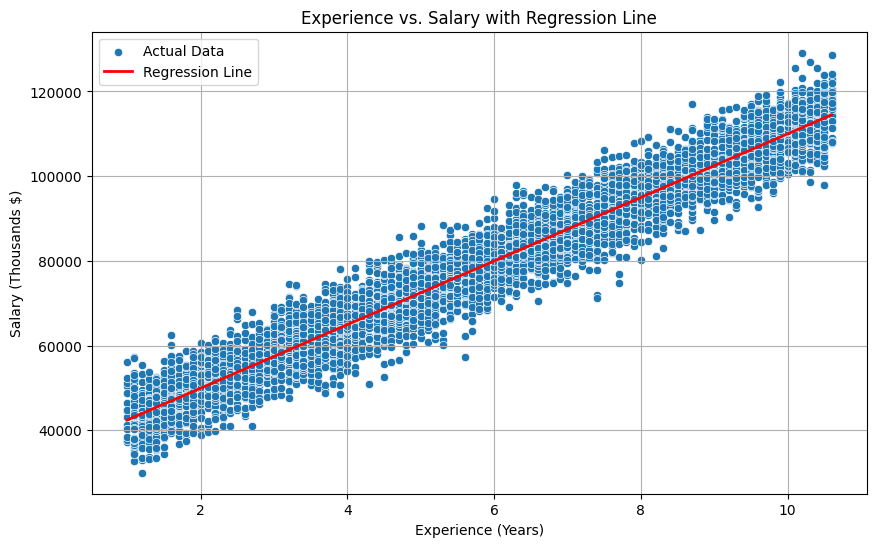

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_salary = pd.read_csv('/content/salary_dataset.csv')

X = df_salary[['YearsExperience']]
y = df_salary['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_salary = LinearRegression()
model_salary.fit(X_train, y_train)

y_pred_salary = model_salary.predict(X_test)

mse_salary = mean_squared_error(y_test, y_pred_salary)
r2_salary = r2_score(y_test, y_pred_salary)

print(f'\nMean Squared Error (MSE): {mse_salary:.2f}')
print(f'R-squared (R2): {r2_salary:.2f}')
print(f"Coefficient: {model_salary.coef_[0]:.2f}")
print(f"Intercept: {model_salary.intercept_:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['YearsExperience'], y=y, label='Actual Data') # Corrected: y directly
plt.plot(X['YearsExperience'], model_salary.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary (Thousands $)')
plt.title('Experience vs. Salary with Regression Line')
plt.legend()
plt.grid(True)
plt.show()




Features (X) and Target (y) defined and preprocessed.
Shape of X after encoding and scaling: (100000, 13)
Shape of y: (100000,)

Data split into training and testing sets:
Shape of X_train: (80000, 13)
Shape of X_test: (20000, 13)
Shape of y_train: (80000,)
Shape of y_test: (20000,)

Logistic Regression model trained.

Accuracy Score: 0.9605

Confusion Matrix:
[[18122   178]
 [  613  1087]]


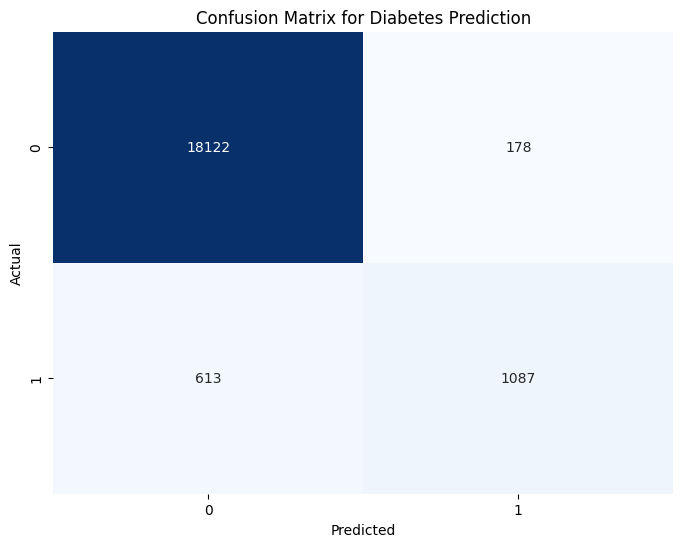


Classification Report (Precision, Recall, F1-score, Support):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.64      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.81      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

df_diabetes = pd.read_csv('/content/diabetes_prediction_dataset.csv')


X = df_diabetes.drop('diabetes', axis=1)
y = df_diabetes['diabetes']


categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns


X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

print("\nFeatures (X) and Target (y) defined and preprocessed.")
print(f"Shape of X after encoding and scaling: {X_encoded.shape}")
print(f"Shape of y: {y.shape}")


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

print("\nData split into training and testing sets:")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


model_logistic = LogisticRegression(random_state=42, solver='liblinear')
model_logistic.fit(X_train, y_train)

print("\nLogistic Regression model trained.")

y_pred = model_logistic.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy Score: {accuracy:.4f}')

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model_logistic.classes_, yticklabels=model_logistic.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Diabetes Prediction')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print('\nClassification Report (Precision, Recall, F1-score, Support):')
print(class_report)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced']
}

log_reg = LogisticRegression(random_state=42)

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

y_pred_tuned = best_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy with best model: {accuracy_tuned:.4f}")

class_report_tuned = classification_report(y_test, y_pred_tuned)
print('\nClassification Report with best model:')
print(class_report_tuned)

Best Parameters: {'C': 1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy with best model: 0.9605

Classification Report with best model:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.64      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.81      0.86     20000
weighted avg       0.96      0.96      0.96     20000

